In [81]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [82]:
df = pd.read_csv('04_Facebook User Analysis.csv')
df.head()

,Name,Users,Facebook_Users%,Date_of_Data,Population
0,India,416.6M,29.16%,2021-06,"1,428,627,663"
1,United States,240M,70.59%,2020-12,"339,996,563"
2,Indonesia,176.5M,63.6%,2021-06,"277,534,122"
3,Brazil,139M,64.23%,2020-12,"216,422,446"
4,Philippines,91M,77.55%,2021-06,"117,337,368"


In [83]:
df['Date_of_Data'] = pd.to_datetime(df['Date_of_Data'])

# Check for missing values
print(df.isnull().sum())

# Display the data types and basic info
print(df.info())

Name               0
Users              0
Facebook_Users%    0
Date_of_Data       0
Population         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             226 non-null    object        
 1   Users            226 non-null    object        
 2   Facebook_Users%  226 non-null    object        
 3   Date_of_Data     226 non-null    datetime64[ns]
 4   Population       226 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 9.0+ KB
None


In [84]:
desc_stats = df.describe()
print(desc_stats)

                        Date_of_Data
count                            226
mean   2021-01-02 03:36:38.230088448
min              2020-12-01 00:00:00
25%              2020-12-01 00:00:00
50%              2020-12-01 00:00:00
75%              2020-12-01 00:00:00
max              2021-06-01 00:00:00


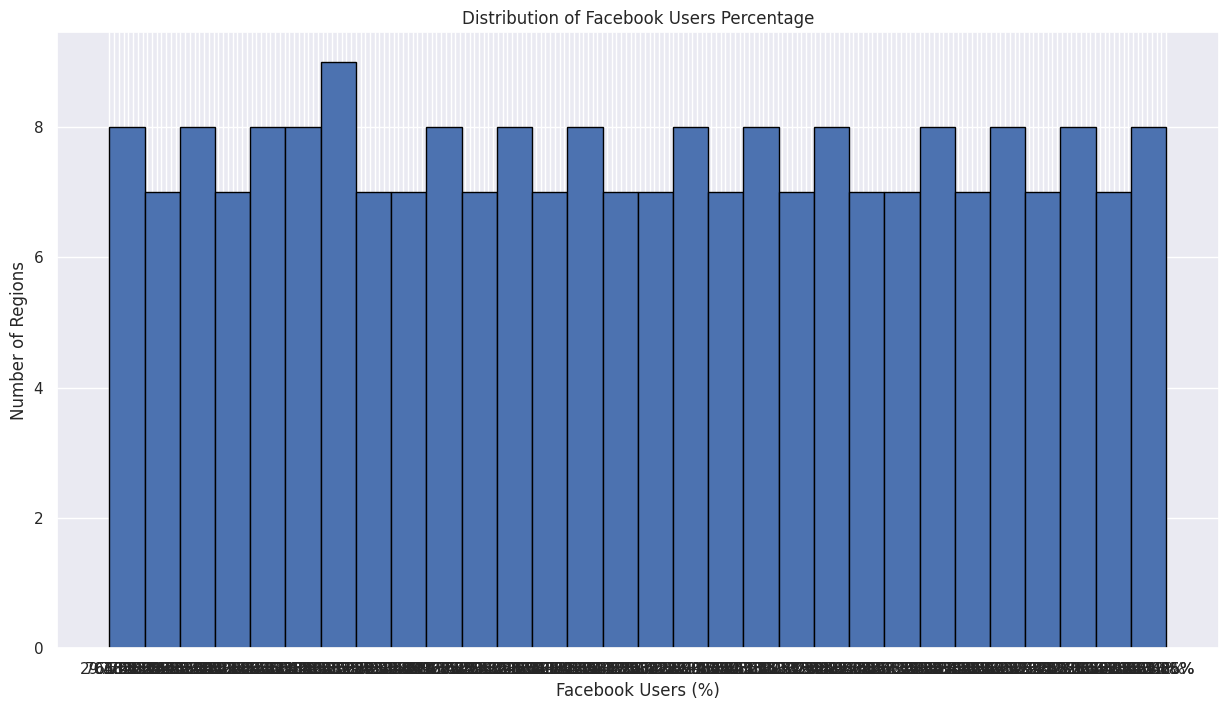

In [85]:
plt.hist(df['Facebook_Users%'], bins=30, edgecolor='black')
plt.title('Distribution of Facebook Users Percentage')
plt.xlabel('Facebook Users (%)')
plt.ylabel('Number of Regions')
plt.show()

In [58]:
df['Facebook_Users%'] = df['Facebook_Users%'].str.rstrip('%').astype(float)

# Check the data type after conversion
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             226 non-null    object        
 1   Users            226 non-null    object        
 2   Facebook_Users%  226 non-null    float64       
 3   Date_of_Data     226 non-null    datetime64[ns]
 4   Population       226 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 9.0+ KB
None


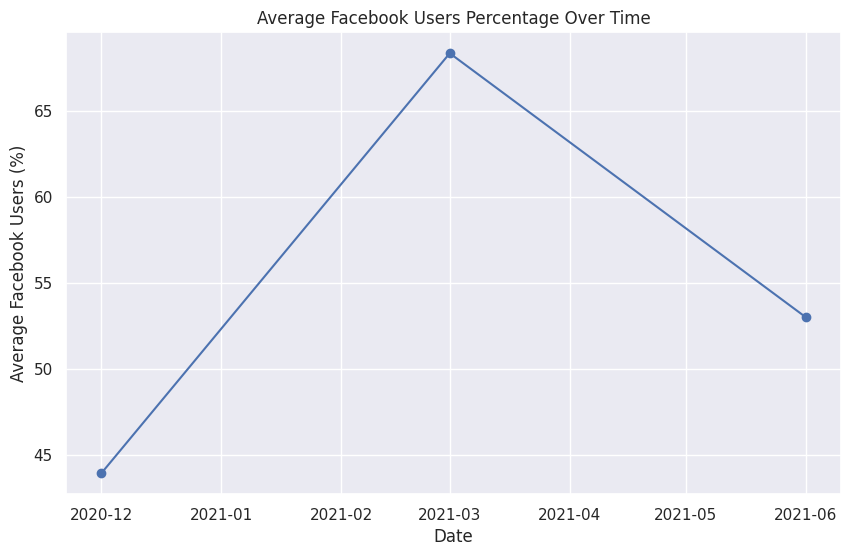

In [59]:
time_series = df.groupby('Date_of_Data')['Facebook_Users%'].mean()

plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series.values, marker='o')
plt.title('Average Facebook Users Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Average Facebook Users (%)')
plt.grid(True)
plt.show()

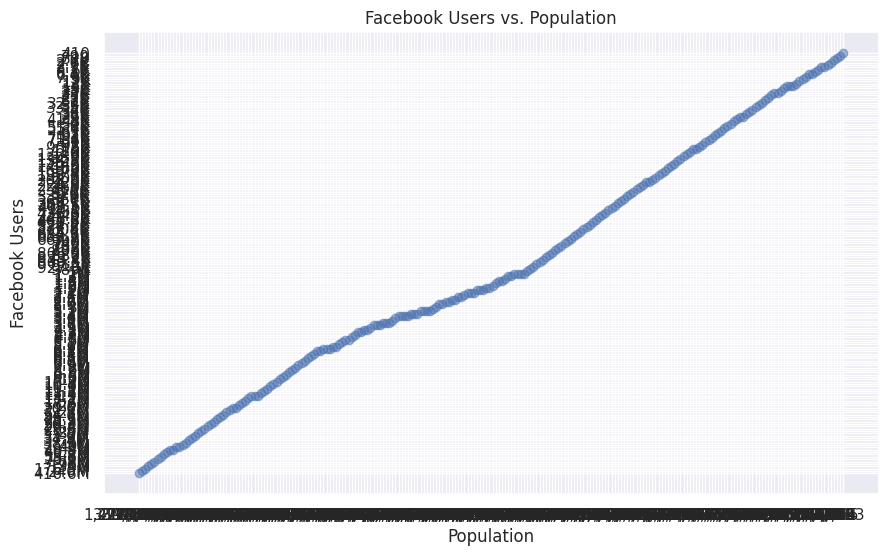

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Population'], df['Users'], alpha=0.5)
plt.title('Facebook Users vs. Population')
plt.xlabel('Population')
plt.ylabel('Facebook Users')
plt.grid(True)
plt.show()

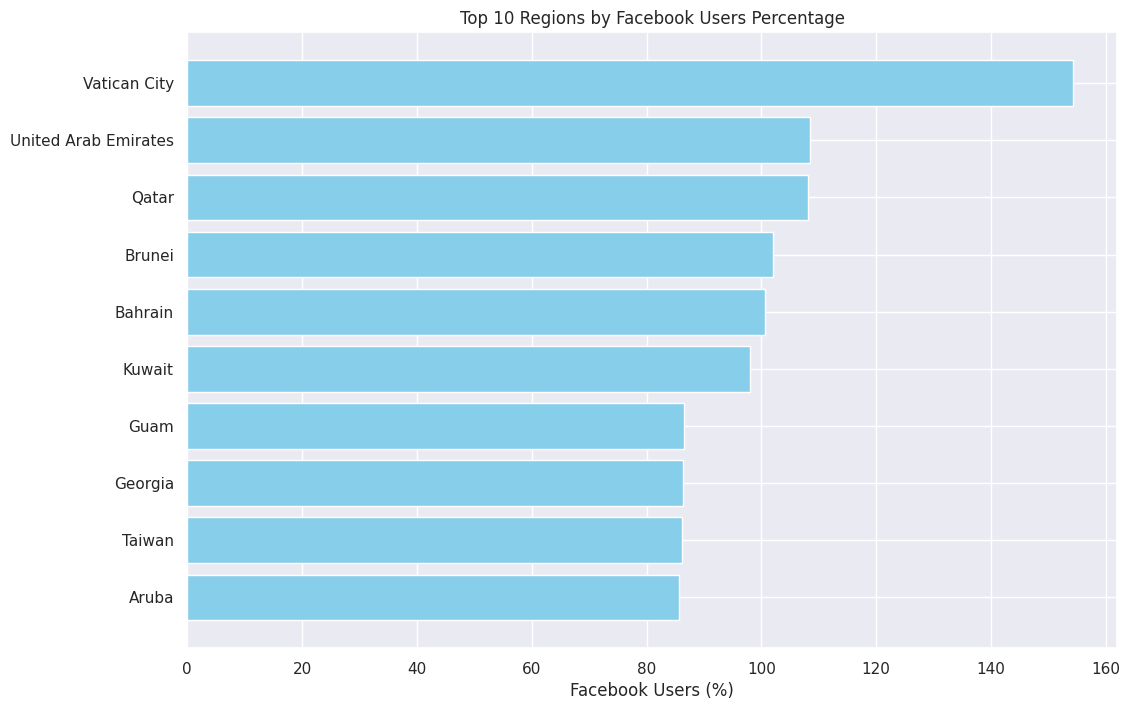

In [61]:
top_regions = df.sort_values(by='Facebook_Users%', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.barh(top_regions['Name'], top_regions['Facebook_Users%'], color='skyblue')
plt.xlabel('Facebook Users (%)')
plt.title('Top 10 Regions by Facebook Users Percentage')
plt.gca().invert_yaxis()
plt.show()

In [62]:
# Find the row with the maximum number of users
max_users_row = df[df['Users'] == df['Users'].max()]

# Extract the country name
most_users_country = max_users_row['Name'].iloc[0]

print("Country with the most Facebook users:", most_users_country)

Country with the most Facebook users: Anguilla


In [63]:
# Convert Date_of_data column to datetime format
df['Date_of_Data'] = pd.to_datetime(df['Date_of_Data'])

# Convert the column to strings
df['Facebook_Users%'] = df['Facebook_Users%'].astype(str)

# Remove percentage symbol and convert to numeric
df['Facebook_Users%'] = df['Facebook_Users%'].str.rstrip('%').astype(float)

# Check for missing values
print(df.isnull().sum())

# Display the data types and basic info
print(df.info())

# Descriptive statistics
desc_stats = df.describe()
print(desc_stats)

Name               0
Users              0
Facebook_Users%    0
Date_of_Data       0
Population         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             226 non-null    object        
 1   Users            226 non-null    object        
 2   Facebook_Users%  226 non-null    float64       
 3   Date_of_Data     226 non-null    datetime64[ns]
 4   Population       226 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 9.0+ KB
None
       Facebook_Users%                   Date_of_Data
count       226.000000                            226
mean         46.790929  2021-01-02 03:36:38.230088448
min           0.050000            2020-12-01 00:00:00
25%          24.072500            2020-12-01 00:00:00
50%          51.175000            2020-12-01 00:00:00
75%    

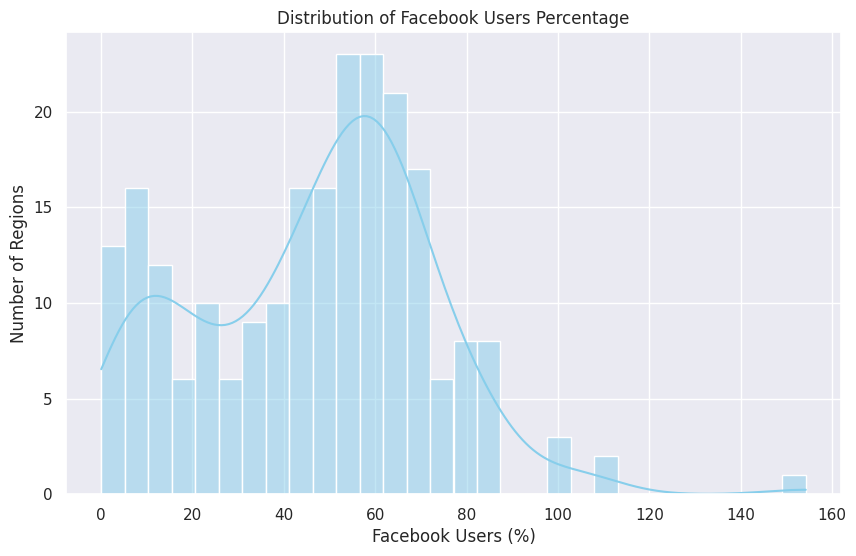

In [64]:
# Distribution of Facebook Users Percentage using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['Facebook_Users%'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Facebook Users Percentage')
plt.xlabel('Facebook Users (%)')
plt.ylabel('Number of Regions')
plt.show()

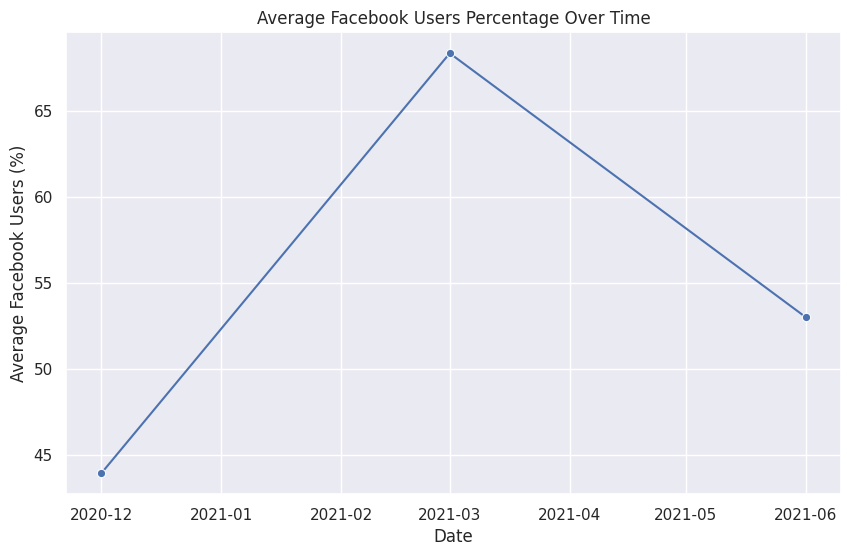

In [65]:
# Time series analysis using Seaborn
time_series = df.groupby('Date_of_Data')['Facebook_Users%'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=time_series.index, y=time_series.values, marker='o')
plt.title('Average Facebook Users Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Average Facebook Users (%)')
plt.grid(True)
plt.show()

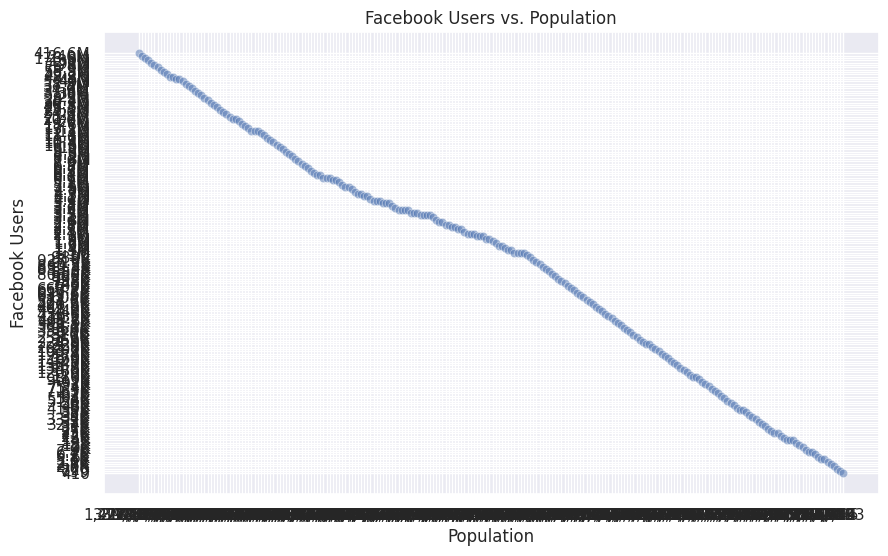

In [66]:
# Facebook Users vs. Population using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population', y='Users', data=df, alpha=0.5)
plt.title('Facebook Users vs. Population')
plt.xlabel('Population')
plt.ylabel('Facebook Users')
plt.grid(True)
plt.show()

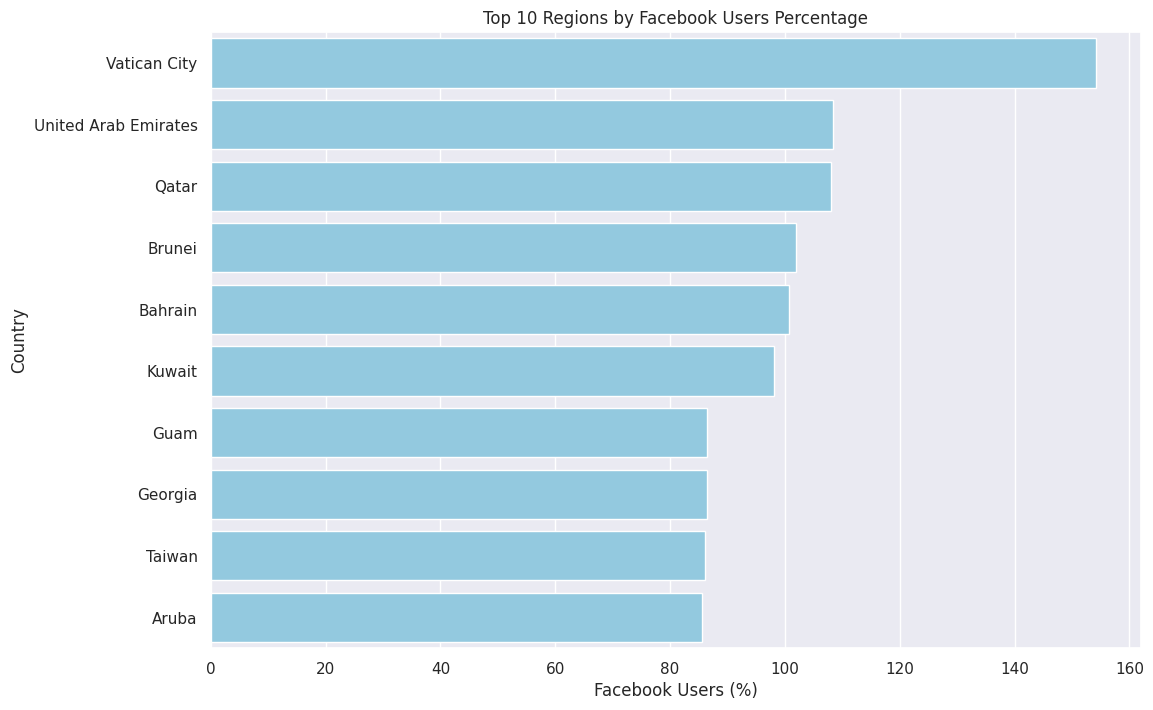

In [67]:
# Top regions by Facebook Users Percentage using Seaborn
top_regions = df.sort_values(by='Facebook_Users%', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Facebook_Users%', y='Name', data=top_regions, color='skyblue')
plt.xlabel('Facebook Users (%)')
plt.ylabel('Country')
plt.title('Top 10 Regions by Facebook Users Percentage')
plt.show()

<Axes: >

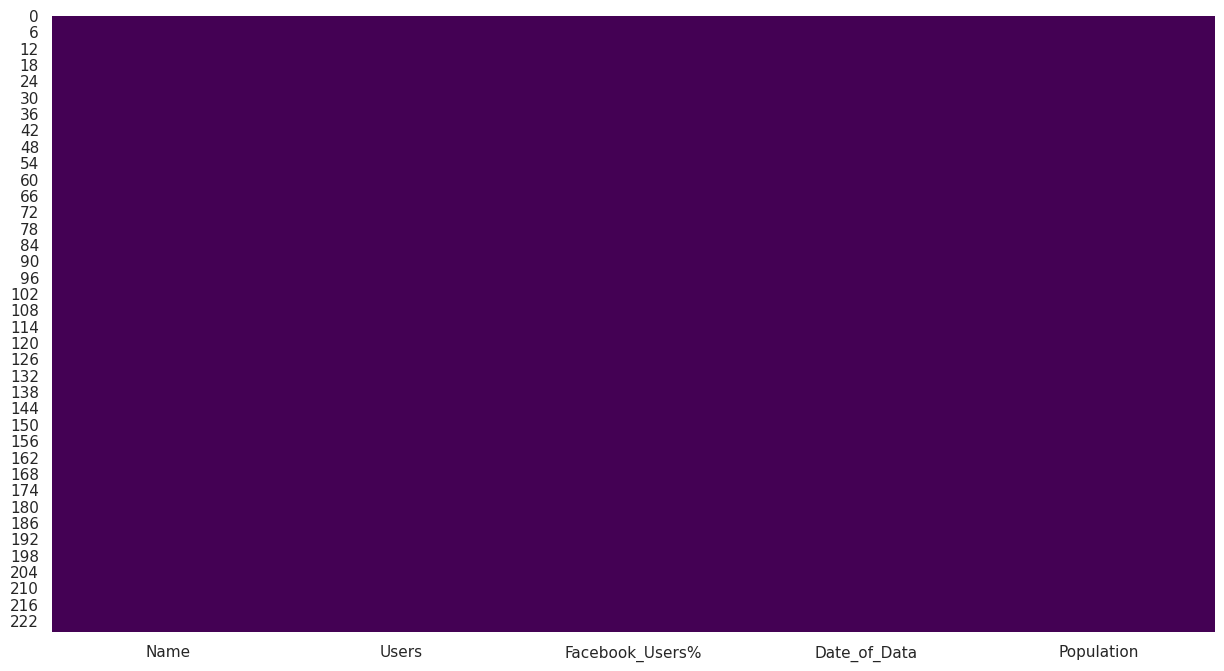

In [68]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [69]:
# Handling missing values
# Imputing missing values with the mean for continuous variables and mode for categorical variables
for col in df.columns:
  if df[col].dtype == 'object':
    df[col].fillna(df[col].mode()[0], inplace=True)
  else:
    df[col].fillna(df[col].mean(), inplace=True)
# Checking for missing values before imputation
missing_values = df.isnull().sum()
# Rechecking for missing values after imputation
missing_values_after = df.isnull().sum()


In [70]:
missing_df = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len( df))*100,2)
missing_df


,Total No. of Missing Values,% of Missing Values
Name,0,0.0
Users,0,0.0
Facebook_Users%,0,0.0
Date_of_Data,0,0.0
Population,0,0.0


In [71]:
df[df.duplicated(keep=False)]


,Name,Users,Facebook_Users%,Date_of_Data,Population


In [72]:
df.duplicated().sum()


0

In [73]:
df.shape


(226, 5)

In [74]:
# Get the list of categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
# Create a DataFrame containing counts of unique values for each categorical column
cat_df = pd.DataFrame(df[cat_cols].melt(var_name='column', value_name='value')
.value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])
# Display summary statistics of categorical variables
display(df[cat_cols].describe())
# Display counts of unique values for each categorical column
display(cat_df)

,Name,Users,Population
count,226,226,226
unique,226,180,226
top,India,3.4M,"1,428,627,663"
freq,1,4,1


count
column value          
Name   Albania       1
       Algeria       1
       Liberia       1
       Kenya         1
       Kiribati      1
...                ...
Users  13M           3
       14K           3
       3.2M          4
       3.4M          4
       1.1M          4

[632 rows x 1 columns]

In [75]:
df.describe(include='O').T


,count,unique,top,freq
Name,226,226,India,1
Users,226,180,3.4M,4
Population,226,226,"1,428,627,663",1


In [80]:
# Inspect useless features
df.nunique().sort_values()

Date_of_Data         3
Users              180
Facebook_Users%    224
Name               226
Population         226
dtype: int64